## Goal 🎯

- Data Cleaning and Preprocessing
- Data Visualization


## Libraries

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "path to files"

## Importing Data

In [ ]:
data = pd.read_csv(path+"/data/Deaths_Region_2007-2020.csv")
print(data.shape)
data.head(10)

(123480, 7)


,Statistic,Year,Area of Residence,Sex,Age at Death,UNIT,VALUE
0,Deaths Occurring,2007,ROI Total,Both sexes,Under 1 year,Number,230.0
1,Deaths Occurring,2007,ROI Total,Both sexes,1 - 4 years,Number,54.0
2,Deaths Occurring,2007,ROI Total,Both sexes,5 - 9 years,Number,17.0
3,Deaths Occurring,2007,ROI Total,Both sexes,10 - 14 years,Number,50.0
4,Deaths Occurring,2007,ROI Total,Both sexes,15 - 19 years,Number,149.0
5,Deaths Occurring,2007,ROI Total,Both sexes,20 - 24 years,Number,202.0
6,Deaths Occurring,2007,ROI Total,Both sexes,25 - 29 years,Number,248.0
7,Deaths Occurring,2007,ROI Total,Both sexes,30 - 34 years,Number,248.0
8,Deaths Occurring,2007,ROI Total,Both sexes,35 - 39 years,Number,295.0
9,Deaths Occurring,2007,ROI Total,Both sexes,40 - 44 years,Number,402.0


In [ ]:
data.tail(10)

,Statistic,Year,Area of Residence,Sex,Age at Death,UNIT,VALUE
123470,Deaths Occurring,2020,Outside the ROI Total,Female,45 - 49 years,Number,NaN
123471,Deaths Occurring,2020,Outside the ROI Total,Female,50 - 54 years,Number,NaN
123472,Deaths Occurring,2020,Outside the ROI Total,Female,55 - 59 years,Number,NaN
123473,Deaths Occurring,2020,Outside the ROI Total,Female,60 - 64 years,Number,NaN
123474,Deaths Occurring,2020,Outside the ROI Total,Female,65 - 69 years,Number,NaN
123475,Deaths Occurring,2020,Outside the ROI Total,Female,70 - 74 years,Number,NaN
123476,Deaths Occurring,2020,Outside the ROI Total,Female,75 - 79 years,Number,NaN
123477,Deaths Occurring,2020,Outside the ROI Total,Female,80 - 84 years,Number,NaN
123478,Deaths Occurring,2020,Outside the ROI Total,Female,85 years and over,Number,NaN
123479,Deaths Occurring,2020,Outside the ROI Total,Female,All ages,Number,NaN


## About Data
- Data is about deaths occured in a particular regions over the time of year 2007 to 2020
- We have 123480 rows and 7 columns in the dataset

## Data Cleaning and Preprocessing

In [ ]:
data.isna().sum()

Statistic                0
Year                     0
Area of Residence        0
Sex                      0
Age at Death             0
UNIT                     0
VALUE                52331
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
print(round((52331/data.shape[0])*100,2),"% missing data is found")

42.38 % missing data is found


In [ ]:
data.nunique().sort_values()

Statistic               1
UNIT                    1
Sex                     3
Year                   14
Age at Death           20
Area of Residence     147
VALUE                1661
dtype: int64

It seems that all the values for Statistic, Unit are same. Let's have a look at categorical columns.

In [ ]:
for column in data[["Statistic","UNIT", "Sex","Year", "Age at Death"]]:
    print(column,data[column].unique())

Statistic ['Deaths Occurring']
UNIT ['Number']
Sex ['Both sexes' 'Male' 'Female']
Year [2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Age at Death ['Under 1 year' '1 - 4 years' '5 - 9 years' '10 - 14 years'
 '15 - 19 years' '20 - 24 years' '25 - 29 years' '30 - 34 years'
 '35 - 39 years' '40 - 44 years' '45 - 49 years' '50 - 54 years'
 '55 - 59 years' '60 - 64 years' '65 - 69 years' '70 - 74 years'
 '75 - 79 years' '80 - 84 years' '85 years and over' 'All ages']


#### Observations
1. As we can see columns Statistic and Unit have single value all over data hence not useful for us. We will drop those columns
2. Sex column has third value Both sexes. We have to check if it is combined of male + female count or something else incomplete data
3. All ages value in "Age at Death" column , is it sum of all deaths of all ages groups ?

In [ ]:
temp_cols = ["Statistic", "UNIT" ] 

print('Shape before deleting cols:', data.shape)
data.drop(temp_cols, axis=1, inplace=True)
print('Shape After deleting cols:', data.shape)

Shape before deleting cols: (123480, 7)
Shape After deleting cols: (123480, 5)


We will make separate columns as male, female and Both sexes grouping by the column Age at Death.
Restructure data in a better and efficient way

In [ ]:
data = data.set_index(['Sex'] + ['Area of Residence','Year', 'Age at Death'  ]).unstack('Sex')
data = data.VALUE.rename_axis([None], axis=1).reset_index()
data

,Area of Residence,Year,Age at Death,Both sexes,Female,Male
0,Ardee,2007,1 - 4 years,NaN,NaN,NaN
1,Ardee,2007,10 - 14 years,NaN,NaN,NaN
2,Ardee,2007,15 - 19 years,NaN,NaN,NaN
3,Ardee,2007,20 - 24 years,NaN,NaN,NaN
4,Ardee,2007,25 - 29 years,NaN,NaN,NaN
...,...,...,...,...,...,...
41155,Youghal Town,2020,75 - 79 years,NaN,NaN,NaN
41156,Youghal Town,2020,80 - 84 years,NaN,NaN,NaN
41157,Youghal Town,2020,85 years and over,NaN,NaN,NaN
41158,Youghal Town,2020,All ages,NaN,NaN,NaN


In [ ]:
data = data[(data["Age at Death"] != "All ages")]
data.drop("Both sexes", axis=1, inplace=True)

In [ ]:
data.isna().sum()

Area of Residence        0
Year                     0
Age at Death             0
Female               18309
Male                 16891
dtype: int64

In [ ]:
data.nunique().sort_values()

Year                  14
Age at Death          19
Area of Residence    147
Female               571
Male                 599
dtype: int64

In [ ]:
res = data[["Area of Residence"]].value_counts()
res

Area of Residence   
Youghal Town            266
Donegal                 266
Kells Town              266
Greystones              266
Granard                 266
                       ... 
Rest of Co. Cavan       266
Rest of Co. Carlow      266
Rest of Co Tipperary    266
ROI Total               266
Ardee                   266
Length: 147, dtype: int64

In [ ]:
set(res.values)

{266}

In [ ]:
data["nan_check"] = [1 if i else 0 for i in data['Male'].isnull().values]
data.head()

,Area of Residence,Year,Age at Death,Female,Male,nan_check
0,Ardee,2007,1 - 4 years,NaN,NaN,1
1,Ardee,2007,10 - 14 years,NaN,NaN,1
2,Ardee,2007,15 - 19 years,NaN,NaN,1
3,Ardee,2007,20 - 24 years,NaN,NaN,1
4,Ardee,2007,25 - 29 years,NaN,NaN,1


 Getting Area of Residences with having highes missing values so that we can drop those cities and for rest we will do missing value treatment

In [ ]:
nan_res = data.groupby("Area of Residence")[["nan_check"]].sum().sort_values(by="nan_check", ascending = False)
nan_res

,nan_check
Area of Residence,
Outside the ROI Total,266
Rest of Fingal,248
Rest of Co Tipperary,247
Ballybay,222
Kilkee,220
...,...
Cork County,3
Leinster,1
Connacht,1


In [ ]:
data.groupby("Year")[["nan_check"]].sum().sort_values(by="Year", ascending = False)

,nan_check
Year,
2020,2169
2019,2071
2018,114
2017,1095
2016,2151
2015,2152
2014,996
2013,76
2012,1222


Selecting threshold in such a way that there will be no missing value for year 2007. We will use those values to fill it ahead in place of nan for future years

In [ ]:
most_nan_res =  nan_res[nan_res["nan_check"] > 190].index

In [ ]:
new_data = data[~data["Area of Residence"].isin(most_nan_res)]
new_data.shape

(30590, 6)

In [ ]:
new_data.nunique()

Area of Residence    115
Year                  14
Age at Death          19
Female               570
Male                 599
_Total               821
dtype: int64

In [ ]:
new_data.groupby("Year")[["nan_check"]].sum().sort_values(by="Year", ascending = False)

,nan_check
Year,
2020,1580
2019,1482
2018,76
2017,713
2016,1543
2015,1544
2014,639
2013,0
2012,614


Collecting indexes having nan values and filling them with previous year values

In [ ]:
new_data.isna().sum()

Area of Residence        0
Year                     0
Age at Death             0
Female               11332
Male                  9996
nan_check                0
dtype: int64

In [ ]:
na_indexes = new_data[new_data.isna().any(axis=1)].index


In [ ]:
### Need to optimize this loop , taking time to run
for i in na_indexes:
  temp = new_data.loc[i]
  prev = new_data[(new_data["Area of Residence"] == temp["Area of Residence"]) & (new_data["Age at Death"] == temp["Age at Death"]) & (new_data["Year"] == temp["Year"]-1)]
  if(np.isnan( new_data.loc[i].Male)):
    new_data.at[i, "Male"] = prev.Male
  if(np.isnan( new_data.loc[i].Female)):
    new_data.at[i, "Female"] = prev.Female

In [ ]:
new_data[new_data.isna().any(axis=1)]

,Area of Residence,Year,Age at Death,Female,Male,nan_check


In [ ]:
new_data.drop("nan_check", axis=1, inplace=True)

In [ ]:
new_data.dtypes

Area of Residence     object
Year                   int64
Age at Death          object
Female               float64
Male                 float64
dtype: object

As the data description is not provided assuming VALUE variable contains number of deaths. <br> We will convert it into int so that float values will get round off

In [ ]:
new_data = new_data.astype({'Male': np.int, 'Female' : np.int})

In [ ]:
new_data["_Total"] = new_data["Female"] + new_data["Male"]

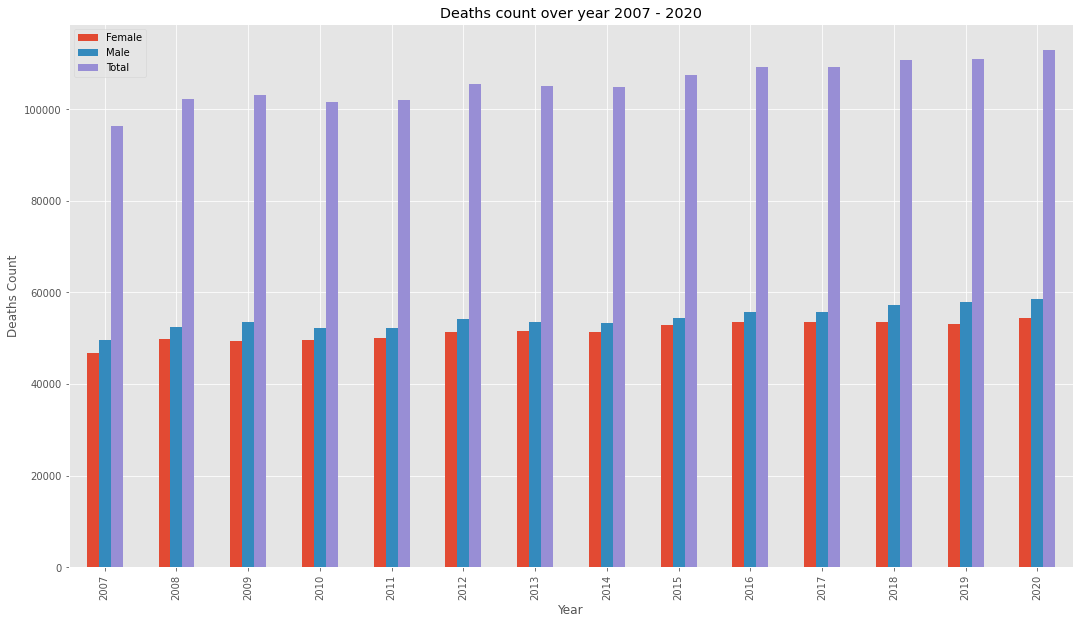

In [ ]:
temp = new_data.groupby(["Year"]).sum()

temp.plot.bar(figsize=((18,10)))
plt.legend([ "Female", "Male", "Total"])
plt.title("Deaths count over year 2007 - 2020")
plt.ylabel("Deaths Count")
plt.show()

In [ ]:
new_data.head(10)

,Area of Residence,Year,Age at Death,Female,Male,_Total
280,Arklow Town,2007,1 - 4 years,0,0,0
281,Arklow Town,2007,10 - 14 years,0,0,0
282,Arklow Town,2007,15 - 19 years,0,0,0
283,Arklow Town,2007,20 - 24 years,0,2,2
284,Arklow Town,2007,25 - 29 years,1,0,1
285,Arklow Town,2007,30 - 34 years,0,1,1
286,Arklow Town,2007,35 - 39 years,1,2,3
287,Arklow Town,2007,40 - 44 years,0,0,0
288,Arklow Town,2007,45 - 49 years,1,0,1
289,Arklow Town,2007,5 - 9 years,0,0,0


In [ ]:
#new_data.reset_index(inplace=True)
new_data.drop("level_0", axis = 1, inplace=True)
new_data

,Area of Residence,Year,Age at Death,Female,Male,_Total
0,Arklow Town,2007,1 - 4 years,0,0,0
1,Arklow Town,2007,10 - 14 years,0,0,0
2,Arklow Town,2007,15 - 19 years,0,0,0
3,Arklow Town,2007,20 - 24 years,0,2,2
4,Arklow Town,2007,25 - 29 years,1,0,1
...,...,...,...,...,...,...
30585,Youghal Town,2020,70 - 74 years,2,6,8
30586,Youghal Town,2020,75 - 79 years,4,2,6
30587,Youghal Town,2020,80 - 84 years,4,4,8
30588,Youghal Town,2020,85 years and over,13,10,23


In [ ]:
new_data.to_csv(path+"/data/Cleaned_Deaths_Region_2007-2020.csv" , encoding='utf-8', index=False)

In [ ]:
df = pd.read_csv(path+"/data/Cleaned_Deaths_Region_2007-2020.csv")
print(df.shape)
df.head(10)

(30590, 6)


,Area of Residence,Year,Age at Death,Female,Male,_Total
0,Arklow Town,2007,1 - 4 years,0,0,0
1,Arklow Town,2007,10 - 14 years,0,0,0
2,Arklow Town,2007,15 - 19 years,0,0,0
3,Arklow Town,2007,20 - 24 years,0,2,2
4,Arklow Town,2007,25 - 29 years,1,0,1
5,Arklow Town,2007,30 - 34 years,0,1,1
6,Arklow Town,2007,35 - 39 years,1,2,3
7,Arklow Town,2007,40 - 44 years,0,0,0
8,Arklow Town,2007,45 - 49 years,1,0,1
9,Arklow Town,2007,5 - 9 years,0,0,0


In [ ]:
!pip install fbprophet

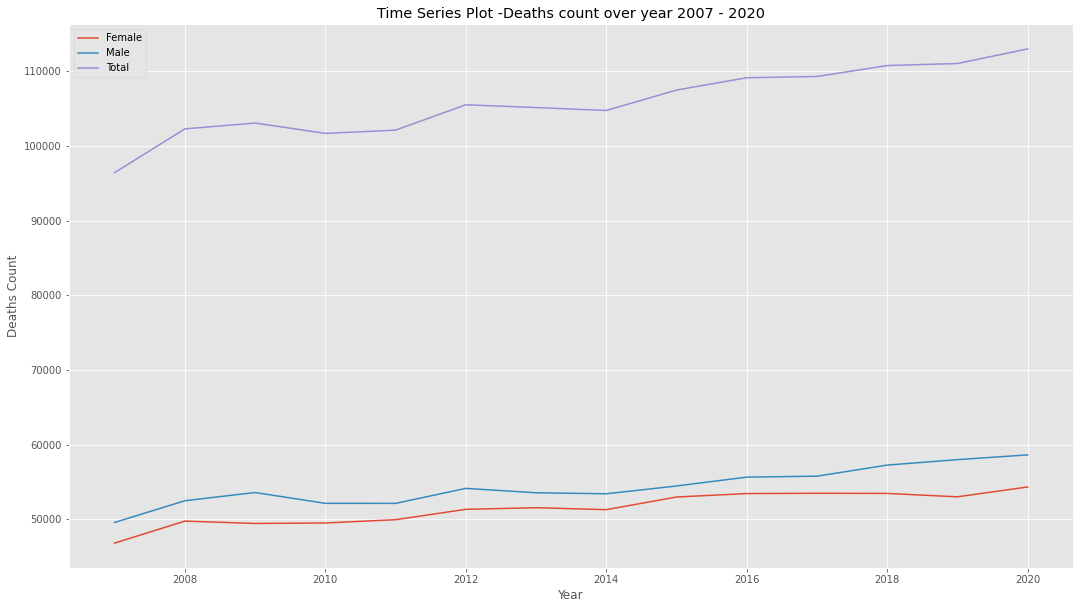

In [ ]:
temp = df.groupby(["Year"]).sum()

temp.plot(figsize=((18,10)))
plt.legend([ "Female", "Male", "Total"])
plt.title("Time Series Plot -Deaths count over year 2007 - 2020")
plt.ylabel("Deaths Count")
plt.show()

### Importing Libraries

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [ ]:
Female_series = temp[["Female"]]
Male_series = temp[["Male"]]
Total_series = temp[["_Total"]]
Female_series.reset_index(inplace=True)
Male_series.reset_index(inplace=True)
Total_series.reset_index(inplace=True)

In [ ]:
# prepare expected column names
Female_series.columns = ['ds', 'y']
Female_series['ds']= pd.to_datetime(Female_series.ds, format='%Y') + pd.offsets.YearEnd(0)
Male_series.columns = ['ds', 'y']
Male_series['ds']= pd.to_datetime(Male_series.ds, format='%Y') + pd.offsets.YearEnd(0)
Total_series.columns = ['ds', 'y']
Total_series['ds']= pd.to_datetime(Total_series.ds, format='%Y') + pd.offsets.YearEnd(0)

In [ ]:
def TS_Summary(future):
  future = pd.DataFrame(future)
  future.columns = ['ds']
  future['ds']= pd.to_datetime(future['ds'])

  # use the model to make a forecast
  forecast = model.predict(future)
  # summarize the forecast
  print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
  # plot forecast

  model.plot(forecast, figsize=((15,7)))
  plt.title("Time Series Forecast for {} - {}".format( future.ds.iloc[0].strftime('%Y'),future.ds.iat[-1].strftime('%Y') ))
  plt.ylabel("Deaths Count")
  plt.show()

### In sample forecast

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


          ds           yhat     yhat_lower     yhat_upper
0 2018-12-31  109924.568226  108809.212519  110911.435239
1 2019-12-31  110416.117184  109299.566469  111445.170612
2 2020-12-31  113638.533611  112597.794173  114672.915258


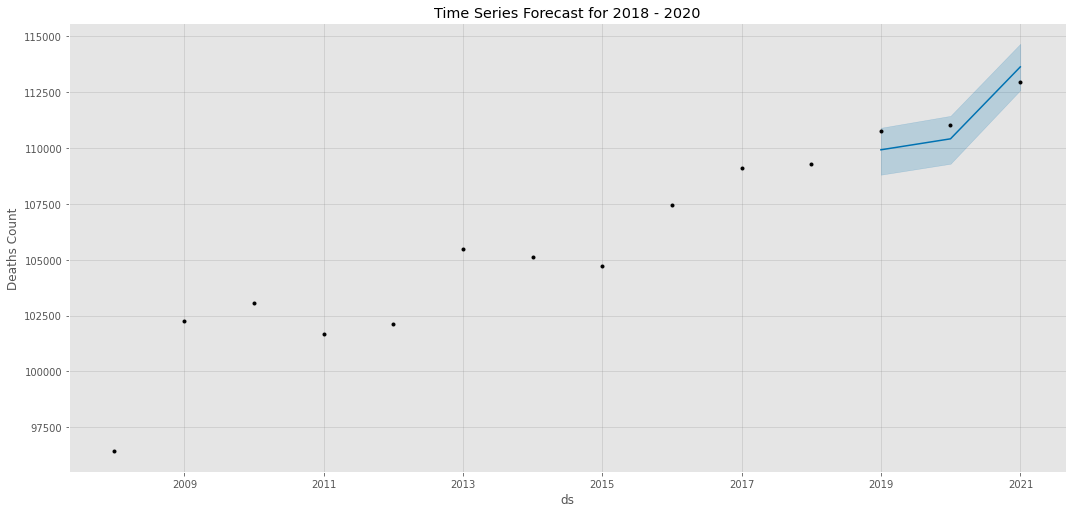

In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(Total_series)
# define the period for which we want a prediction
future = list()
for i in range(2018, 2021):
  date = pd.to_datetime(i, format='%Y') + pd.offsets.YearEnd(0)
  future.append([date])
TS_Summary(future)



### Out-of-Sample Forecast

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.


          ds           yhat     yhat_lower     yhat_upper
0 2021-12-31  113719.284638  112736.025482  114782.925561
1 2022-12-31  114004.638976  113032.411626  115068.282186
2 2023-12-31  114496.187934  113433.110407  115548.676067


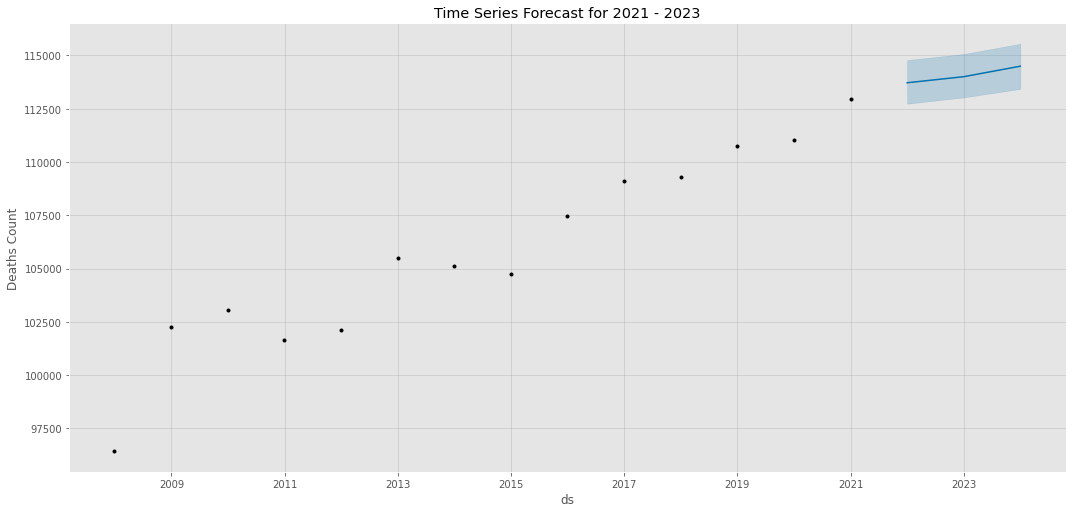

In [ ]:
# define the model
model = Prophet()
# fit the model
model.fit(Total_series)
# define the period for which we want a prediction
future = list()
for i in range(2021, 2024):
  date = pd.to_datetime(i, format='%Y') + pd.offsets.YearEnd(0)
  future.append([date])
TS_Summary(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.


MAE: 1771.275


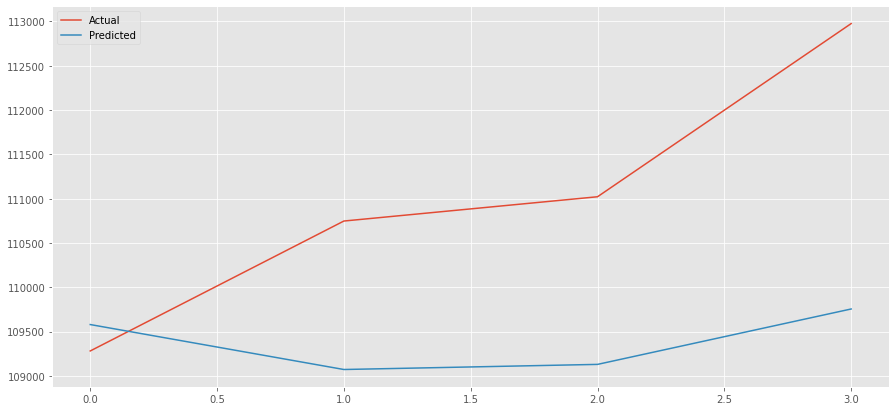

In [ ]:
# create test dataset, remove last 12 months
train = Total_series.drop(Total_series.index[-4:])

# define the model
model = Prophet()
# fit the model
model.fit(train)
# define the period for which we want a prediction
future = list()
for i in range(2016, 2020):
	date = pd.to_datetime(i, format='%Y') + pd.offsets.YearEnd(0)
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds'] = pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# calculate MAE between expected and predicted values for december
y_true = Total_series['y'][-4:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
plt.figure(figsize=((15,7)))
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.



 Total Deaths
          ds           yhat     yhat_lower     yhat_upper
0 2021-12-31  113719.284638  112726.749290  114665.976501
1 2022-12-31  114004.638976  113016.567520  114969.137132
2 2023-12-31  114496.187934  113456.336356  115578.991903


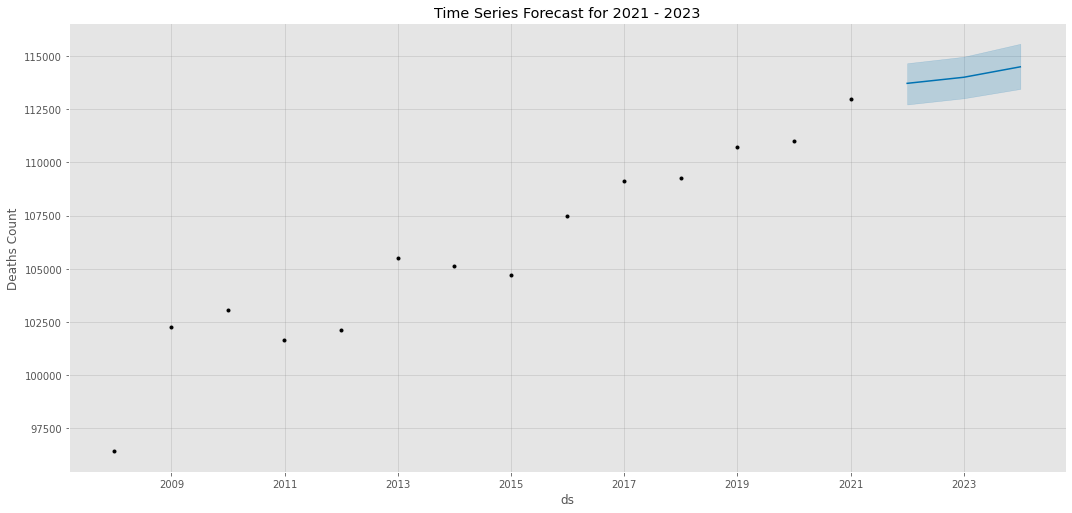

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.



 Male Deaths
          ds          yhat    yhat_lower    yhat_upper
0 2021-12-31  59343.176917  58504.960060  60184.237818
1 2022-12-31  59668.486898  58869.684479  60462.999631
2 2023-12-31  59929.536863  59110.493768  60646.320747


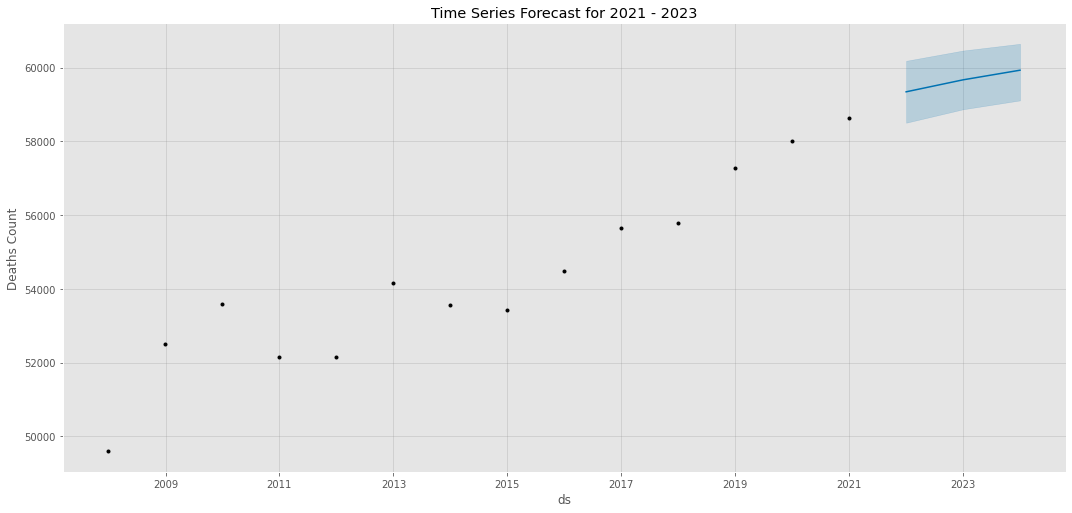

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.



 Female Deaths
          ds          yhat    yhat_lower    yhat_upper
0 2021-12-31  54253.093300  53793.883268  54740.144505
1 2022-12-31  54098.052569  53577.276047  54555.019381
2 2023-12-31  54089.196228  53578.714340  54605.052085


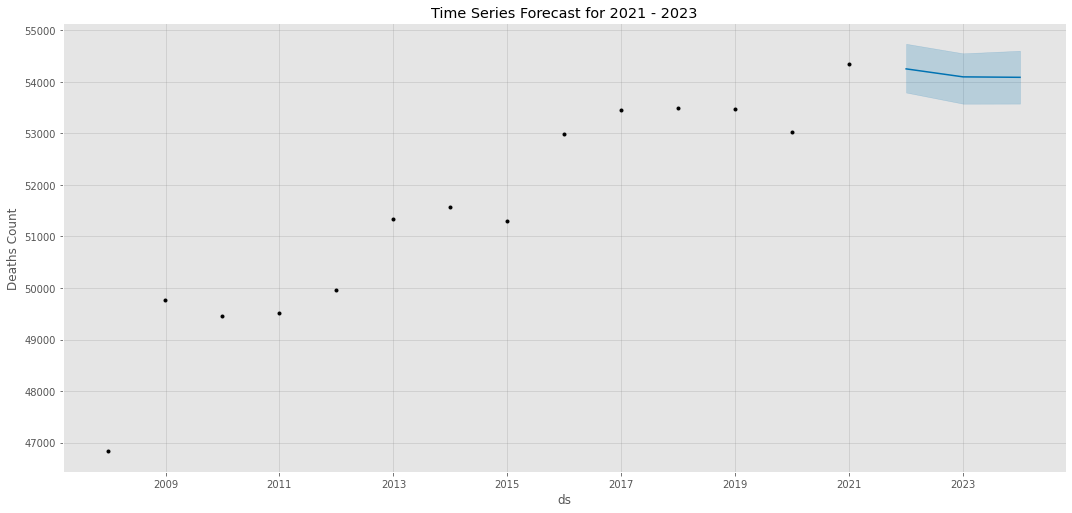

In [ ]:
series = {'Total Deaths': Total_series,'Male Deaths' : Male_series, 'Female Deaths' : Female_series}

for key in series:
  # define the model
  model = Prophet()
  # fit the model
  model.fit(series[key])
  # define the period for which we want a prediction
  future = list()
  for i in range(2021, 2024):
    date = pd.to_datetime(i, format='%Y') + pd.offsets.YearEnd(0)
    future.append([date])
  print("\n",key)
  TS_Summary(future)

## Regression

In [ ]:
df

,Area of Residence,Year,Age at Death,Female,Male,_Total
0,Arklow Town,2007,1 - 4 years,0,0,0
1,Arklow Town,2007,10 - 14 years,0,0,0
2,Arklow Town,2007,15 - 19 years,0,0,0
3,Arklow Town,2007,20 - 24 years,0,2,2
4,Arklow Town,2007,25 - 29 years,1,0,1
...,...,...,...,...,...,...
30585,Youghal Town,2020,70 - 74 years,2,6,8
30586,Youghal Town,2020,75 - 79 years,4,2,6
30587,Youghal Town,2020,80 - 84 years,4,4,8
30588,Youghal Town,2020,85 years and over,13,10,23


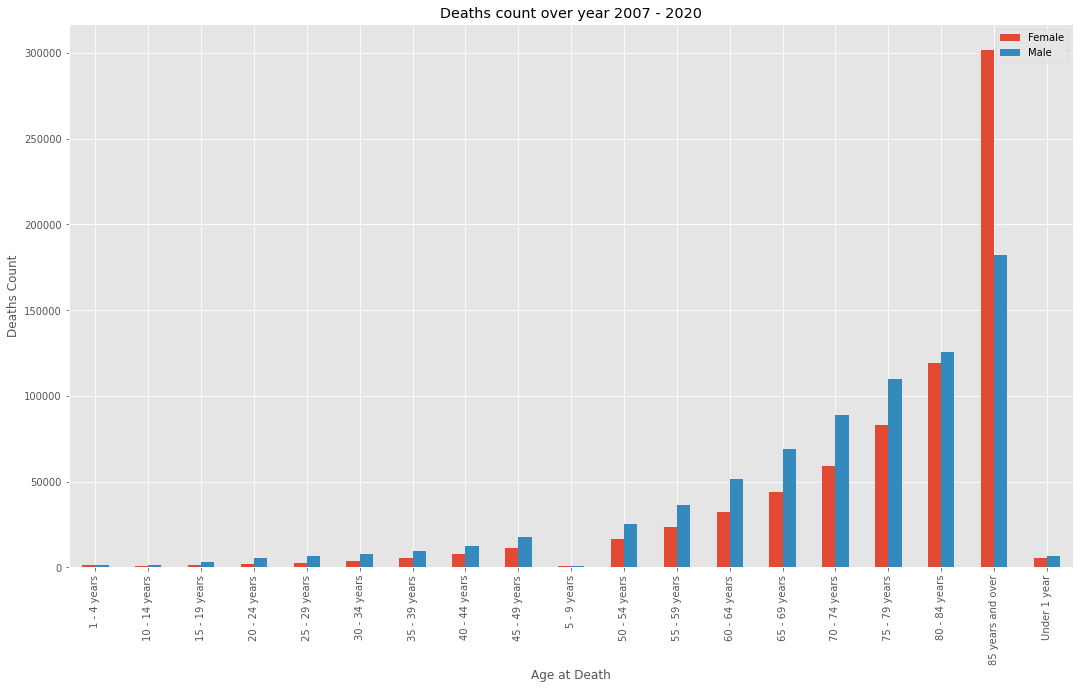

In [ ]:
temp = df.groupby(["Age at Death"])["Female", "Male"].sum()

temp.plot.bar(figsize=((18,10)))
plt.legend([ "Female", "Male"])
plt.title("Deaths count over year 2007 - 2020")
plt.ylabel("Deaths Count")
plt.show()

From the above graph, we can conclude that - <br> Most of the female deaths are occuring in the age group of 85 year and over. Females are tend to live longer than males

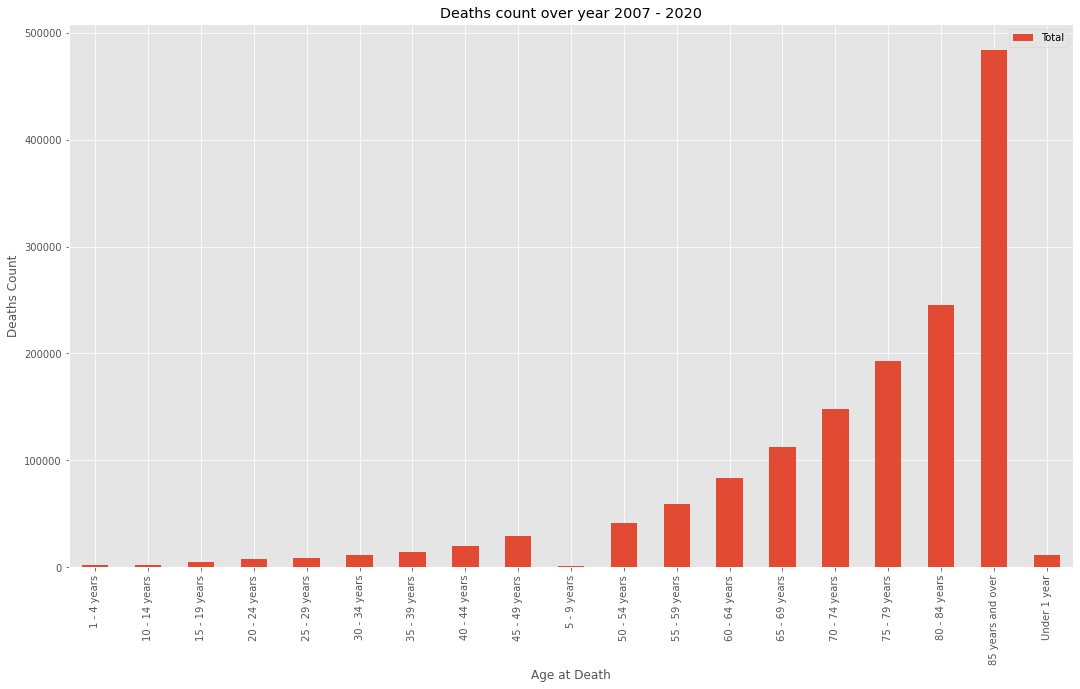

In [ ]:
temp = df.groupby(["Age at Death"])["_Total"].sum()

temp.plot.bar(figsize=((18,10)))
plt.legend([ "Total"])
plt.title("Deaths count over year 2007 - 2020")
plt.ylabel("Deaths Count")
plt.show()

### Feature Selection

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable) ANOVA Test result: Probability of H0 being true

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, CategoricalPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in CategoricalPredictorList:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
# Calling the function to check which categorical variables are correlated with target
CategoricalPredictorList=['Age at Death', 'Area of Residence', "Year"]
FunctionAnova(inpData=df, 
              TargetVariable='_Total', 
              CategoricalPredictorList=CategoricalPredictorList)

##### ANOVA Results ##### 

Age at Death is correlated with _Total | P-Value: 0.0
Area of Residence is correlated with _Total | P-Value: 0.0
Year is NOT correlated with _Total | P-Value: 0.9999838268251429


['Age at Death', 'Area of Residence']

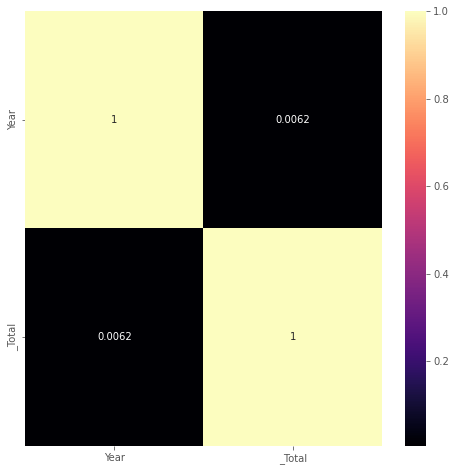

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df[["Year", "_Total"]].corr() , annot=True , cmap = "magma" )
plt.show()

In [ ]:
SelectedColumns=['Age at Death', 'Area of Residence', 'Year', '_Total']

# Selecting final columns
dataML=df[SelectedColumns]
dataML.head()


,Age at Death,Area of Residence,Year,_Total
0,1 - 4 years,Arklow Town,2007,0
1,10 - 14 years,Arklow Town,2007,0
2,15 - 19 years,Arklow Town,2007,0
3,20 - 24 years,Arklow Town,2007,2
4,25 - 29 years,Arklow Town,2007,1


## Data Pre-processing for Machine Learning

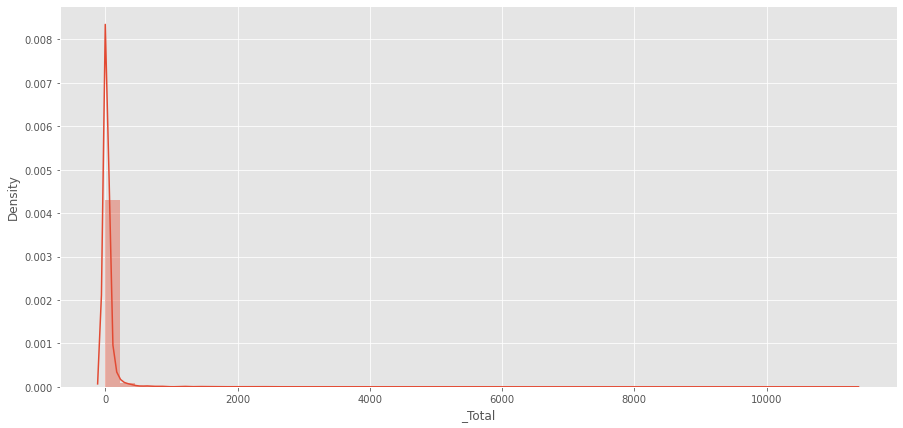

In [ ]:
plt.figure(figsize=((15,7)))
sns.distplot(dataML["_Total"], bins = 50 )

In [ ]:
dataML[dataML["_Total"] > 2000]

,Age at Death,Area of Residence,Year,_Total
12519,85 years and over,Leinster,2007,2551
12537,80 - 84 years,Leinster,2008,2394
12538,85 years and over,Leinster,2008,3799
12556,80 - 84 years,Leinster,2009,2409
12557,85 years and over,Leinster,2009,3986
...,...,...,...,...
18880,65 - 69 years,ROI Total,2020,2320
18881,70 - 74 years,ROI Total,2020,3502
18882,75 - 79 years,ROI Total,2020,4045
18883,80 - 84 years,ROI Total,2020,5301


In [ ]:
dataML[dataML["Area of Residence"] == "ROI Total"]

,Age at Death,Area of Residence,Year,_Total
18620,1 - 4 years,ROI Total,2007,54
18621,10 - 14 years,ROI Total,2007,50
18622,15 - 19 years,ROI Total,2007,149
18623,20 - 24 years,ROI Total,2007,202
18624,25 - 29 years,ROI Total,2007,248
...,...,...,...,...
18881,70 - 74 years,ROI Total,2020,3502
18882,75 - 79 years,ROI Total,2020,4045
18883,80 - 84 years,ROI Total,2020,5301
18884,85 years and over,ROI Total,2020,11272


In [ ]:
temp = dataML.groupby(["Area of Residence"])["_Total"].sum().sort_values(ascending = False)
temp

Area of Residence
ROI Total          414381
Leinster           203167
Munster            123695
Dublin City         58507
Connacht            54139
                    ...  
Trim Town             520
Kinsale Town          481
Templemore Town       402
Bundoran Town         379
Clones Town           328
Name: _Total, Length: 115, dtype: int64

In [ ]:
dataML = dataML[dataML["Area of Residence"] != "ROI Total"]

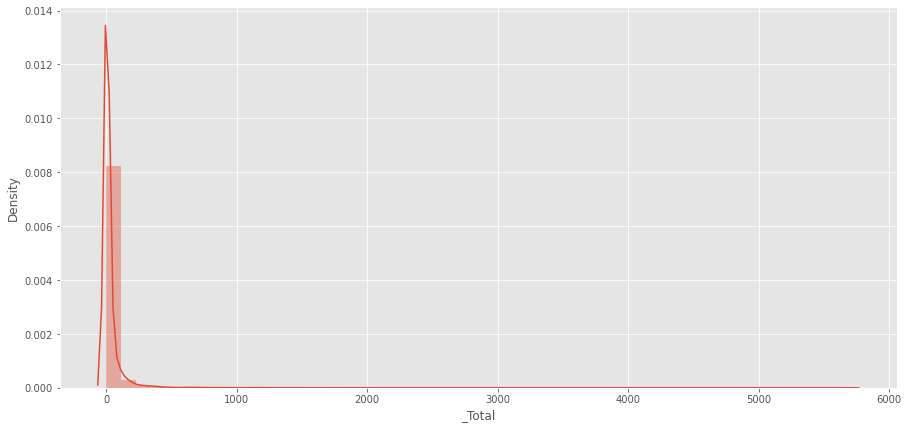

In [ ]:
plt.figure(figsize=((15,7)))
sns.distplot(dataML["_Total"], bins = 50 )

In [ ]:
dataML

,Age at Death,Area of Residence,Year,_Total
0,1 - 4 years,Arklow Town,2007,0
1,10 - 14 years,Arklow Town,2007,0
2,15 - 19 years,Arklow Town,2007,0
3,20 - 24 years,Arklow Town,2007,2
4,25 - 29 years,Arklow Town,2007,1
...,...,...,...,...
30585,70 - 74 years,Youghal Town,2020,8
30586,75 - 79 years,Youghal Town,2020,6
30587,80 - 84 years,Youghal Town,2020,8
30588,85 years and over,Youghal Town,2020,23


In [ ]:
# label encode final_grade

le = preprocessing.LabelEncoder()
dataML["Age at Death"] = le.fit_transform(dataML["Age at Death"])
ages_dict = le.classes_
print(ages_dict)
dataML["Area of Residence"] = le.fit_transform(dataML["Area of Residence"])
area_dict = le.classes_
print(area_dict)

['1 - 4 years' '10 - 14 years' '15 - 19 years' '20 - 24 years'
 '25 - 29 years' '30 - 34 years' '35 - 39 years' '40 - 44 years'
 '45 - 49 years' '5 - 9 years' '50 - 54 years' '55 - 59 years'
 '60 - 64 years' '65 - 69 years' '70 - 74 years' '75 - 79 years'
 '80 - 84 years' '85 years and over' 'Under 1 year']
['Arklow Town' 'Athlone Town' 'Athy Town' 'Ballina Town'
 'Ballinasloe Town' 'Birr Town' 'Bray Town' 'Buncrana Town'
 'Bundoran Town' 'Carlow' 'Carlow Town' 'Carrick-on-Suir Town'
 'Carrickmacross Town' 'Cashel Town' 'Castlebar Town' 'Castleblaney Town'
 'Cavan' 'Cavan Town' 'Clare' 'Clonakilty Town' 'Clones Town'
 'Clonmel Borough' 'Cobh Town' 'Connacht' 'Cork City' 'Cork County'
 'Donegal' 'Drogheda Borough' 'Dublin City' 'Dun Laoghaire Rathdown'
 'Dundalk Town' 'Dungarvan Town' 'Ennis Town' 'Enniscorthy Town'
 'Fermoy Town' 'Fingal' 'Galway City' 'Galway County' 'Kells Town' 'Kerry'
 'Kildare' 'Kilkenny' 'Kilkenny Borough' 'Killarney Town' 'Kilrush Town'
 'Kinsale Town' 'Laois' '

In [ ]:
dataML

,Age at Death,Area of Residence,Year,_Total
0,0,0,2007,0
1,1,0,2007,0
2,2,0,2007,0
3,3,0,2007,2
4,4,0,2007,1
...,...,...,...,...
30585,14,113,2020,8
30586,15,113,2020,6
30587,16,113,2020,8
30588,17,113,2020,23


In [ ]:
# dataset train_test_split

X = dataML.drop('_Total',axis=1)
y = dataML._Total


## Model Building

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.pipeline import Pipeline, make_pipeline

# Tuning
from sklearn.model_selection import GridSearchCV


# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True )

print("The Shape of X_train:", X_train.shape)
print("The Shape of X_test:", X_test.shape)
print("The Shape of y_train:", y_train.shape)
print("The Shape of y_test:", y_test.shape)
print("\n\n---------------------------------------------------------------------------------\n\n")

models = []
models.append(('LinearRegression', LinearRegression()))
models.append(('AdaBoostRegressor'   , AdaBoostRegressor()))
models.append(('SVM'  , SVR()))
models.append(('DecisionTreeRegressor', DecisionTreeRegressor()))
models.append(('XGBRegressor', XGBRegressor()))
models.append(('GradientBoostingRegressor', GradientBoostingRegressor()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('RandomForestRegressor', RandomForestRegressor()))


model_name = []
accuracy = []

for name, model in models: 
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_name.append(name)
    accuracy.append(metrics.r2_score(y_test,y_pred))
    print(name, metrics.r2_score(y_test,y_pred))
    
Accuracy_df = pd.DataFrame({"Model" : model_name , "Accuracy" : accuracy})
Accuracy_df

The Shape of X_train: (21226, 3)
The Shape of X_test: (9098, 3)
The Shape of y_train: (21226,)
The Shape of y_test: (9098,)


---------------------------------------------------------------------------------


LinearRegression 0.04633325997334026
AdaBoostRegressor -1.4840295892005426
SVM -0.03687368245184852
DecisionTreeRegressor 0.9957715508732332
[13:44:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor 0.7232631610130955
GradientBoostingRegressor 0.7172804361979941
KNeighborsRegressor 0.5945476821003379
RandomForestRegressor 0.9969365751010367


,Model,Accuracy
0,LinearRegression,0.046333
1,AdaBoostRegressor,-1.484030
2,SVM,-0.036874
3,DecisionTreeRegressor,0.995772
4,XGBRegressor,0.723263
5,GradientBoostingRegressor,0.717280
6,KNeighborsRegressor,0.594548
7,RandomForestRegressor,0.996937


                       Model  Accuracy
1          AdaBoostRegressor -1.484030
2                        SVM -0.036874
0           LinearRegression  0.046333
6        KNeighborsRegressor  0.594548
5  GradientBoostingRegressor  0.717280
4               XGBRegressor  0.723263
3      DecisionTreeRegressor  0.995772
7      RandomForestRegressor  0.996937


<BarContainer object of 8 artists>

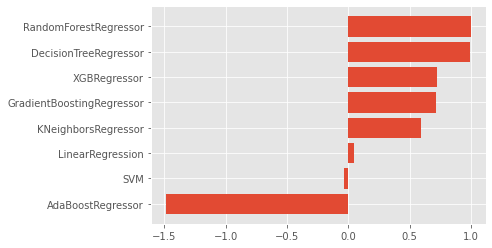

In [ ]:
Temp = Accuracy_df.sort_values("Accuracy")
print(Temp)
plt.barh( Temp["Model"],Temp["Accuracy"] )

In [ ]:
dt_final = DecisionTreeRegressor()
dt_final = dt_final.fit(X_train, y_train)

print("Decison Tree Regressor Model Training Score" , ":" , dt_final.score(X_train, y_train) , "," ,
      "Test Score" ,":" , dt_final.score(X_test, y_test))

Decison Tree Regressor Model Training Score : 1.0 , Test Score : 0.9957737188237397


In [ ]:
dt_final.feature_importances_

array([0.11522143, 0.86470419, 0.02007438])

In [ ]:
dt_final.max_features_

3